In [130]:
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

In [131]:
fb = pd.read_csv("./FB.csv")
twMAU = pd.read_csv("./TwitterMAU.csv")
tw = pd.read_csv("./Tw.csv")

In [132]:
twMAU = twMAU.iloc[::-1]

In [133]:
fb = fb.iloc[::-1]

In [134]:
def fixQuarter(quarter : str, social : str):
    data = quarter.split(" ")
    
    if social == 'fb':
        data = data[:-1]
    
    return data[0] + "'" + data[1][-2:]

def fixTwQuarter(quarter : str):
    data = quarter.split(" ")
    

fb['quarter'] = fb['quarter'].apply(lambda quarter: fixQuarter(quarter, 'fb'))
twMAU['quarter'] = twMAU['quarter'].apply(lambda quarter: fixQuarter(quarter, 'Tw'))

In [135]:
twCom = pd.merge(tw, twMAU, on="quarter")

In [136]:
twCom

,quarter,DAU,MAU
0,Q1'17,109,327.0
1,Q2'17,110,326.0
2,Q3'17,114,330.0
3,Q4'17,115,330.0
4,Q1'18,120,336.0
5,Q2'18,122,335.0
6,Q3'18,124,326.0
7,Q4'18,126,321.0
8,Q1'19,134,330.0


In [100]:
twMAU

,quarter,MAU
32,Q1'11,68.0
31,Q2'11,85.0
30,Q3'11,101.0
29,Q4'11,117.0
28,Q1'12,138.0
27,Q2'12,151.0
26,Q3'12,167.0
25,Q4'12,185.0
24,Q1'13,204.0
23,Q2'13,218.0


<AxesSubplot:xlabel='quarter', ylabel='DAU'>

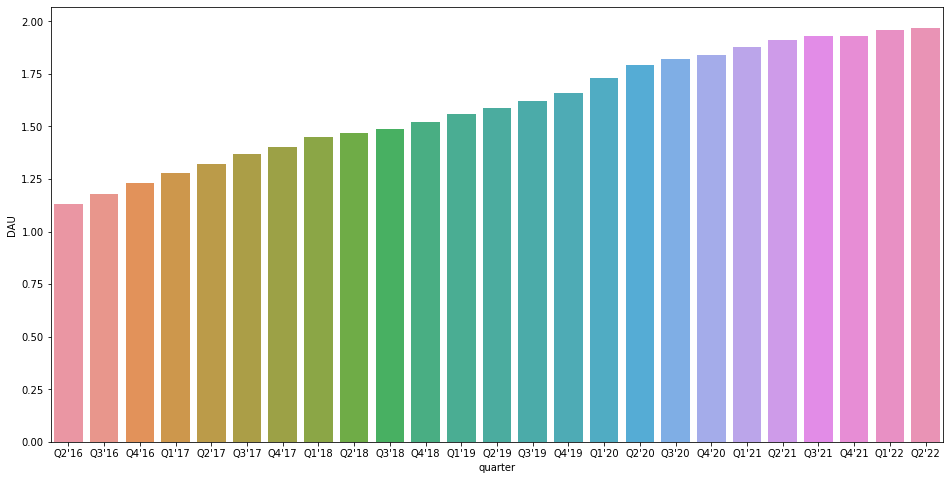

In [128]:
plt.figure(figsize=(16, 8))
sns.barplot(x = 'quarter', y = 'DAU', data=fb)

<AxesSubplot:xlabel='quarter', ylabel='DAU'>

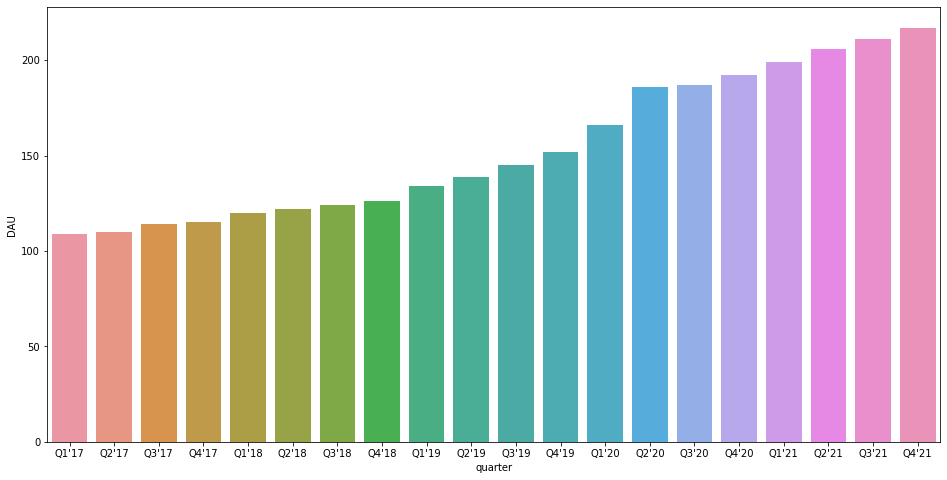

In [129]:
plt.figure(figsize=(16, 8))
sns.barplot(x = 'quarter', y = 'DAU', data=tw)

In [117]:
pd.concat([fb, twCom])

,quarter,DAP,MAP,DAU,MAU
24,Q2'16,0.00,0.00,1.13,1.71
23,Q3'16,0.00,0.00,1.18,1.79
22,Q4'16,0.00,0.00,1.23,1.86
21,Q1'17,0.00,0.00,1.28,1.94
20,Q2'17,0.00,0.00,1.32,2.01
19,Q3'17,0.00,0.00,1.37,2.07
18,Q4'17,0.00,0.00,1.40,2.13
17,Q1'18,0.00,0.00,1.45,2.20
16,Q2'18,0.00,0.00,1.47,2.23
15,Q3'18,0.00,0.00,1.49,2.27
